In [1]:
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt
import random

from scipy.signal import convolve2d
from scipy.ndimage import convolve

from perlin_noise import perlin_noise
from flood_fill import flood_fill

In [2]:
plt.rcParams['figure.figsize'] = (16,12)
np.random.seed(1234)

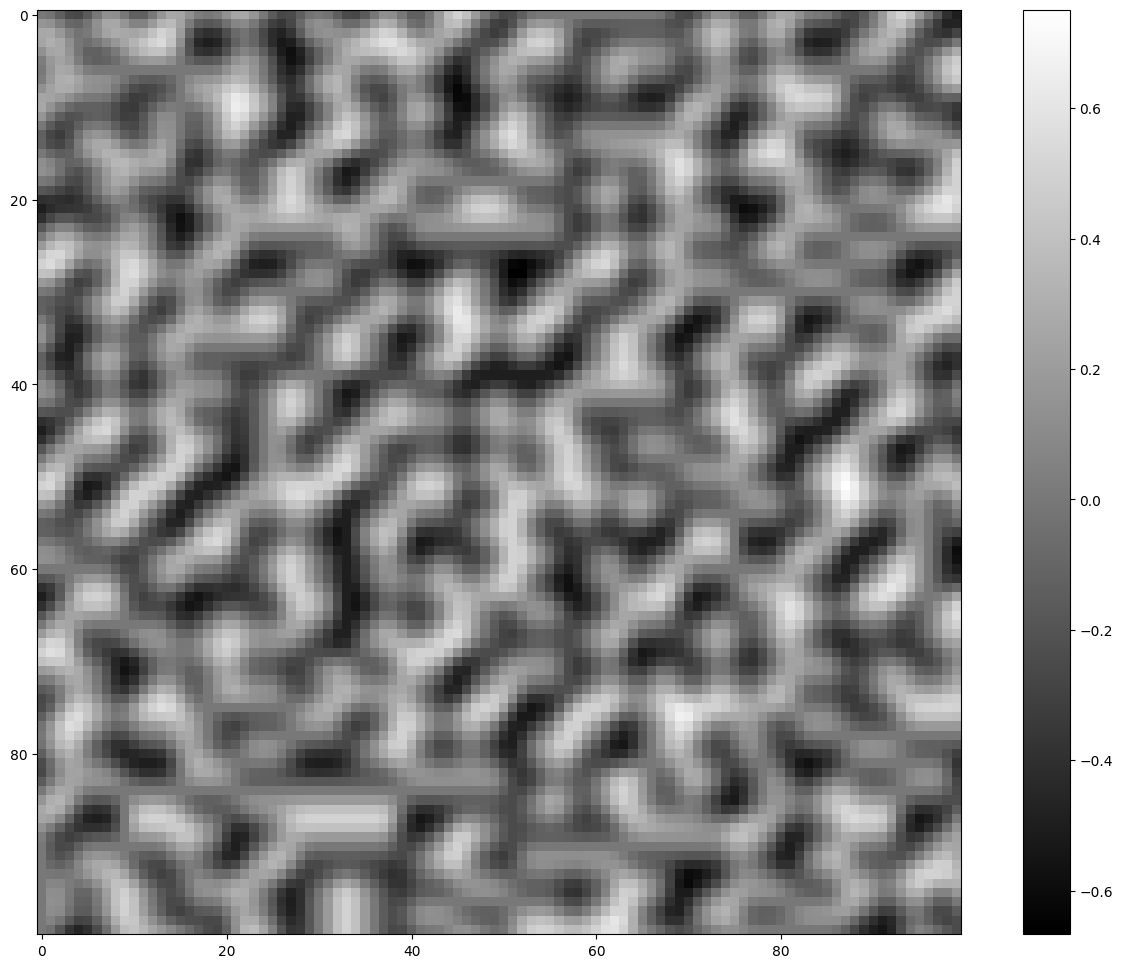

In [3]:
# Generate and display the Perlin noise
width, height = 100, 100
perlin_noise_grid = perlin_noise(width, height, scale=6)

# Display the generated Perlin noise
plt.imshow(perlin_noise_grid, cmap='gray')
plt.colorbar()
plt.show()


-0.6666666666666667 0.75 0.003946803078798962


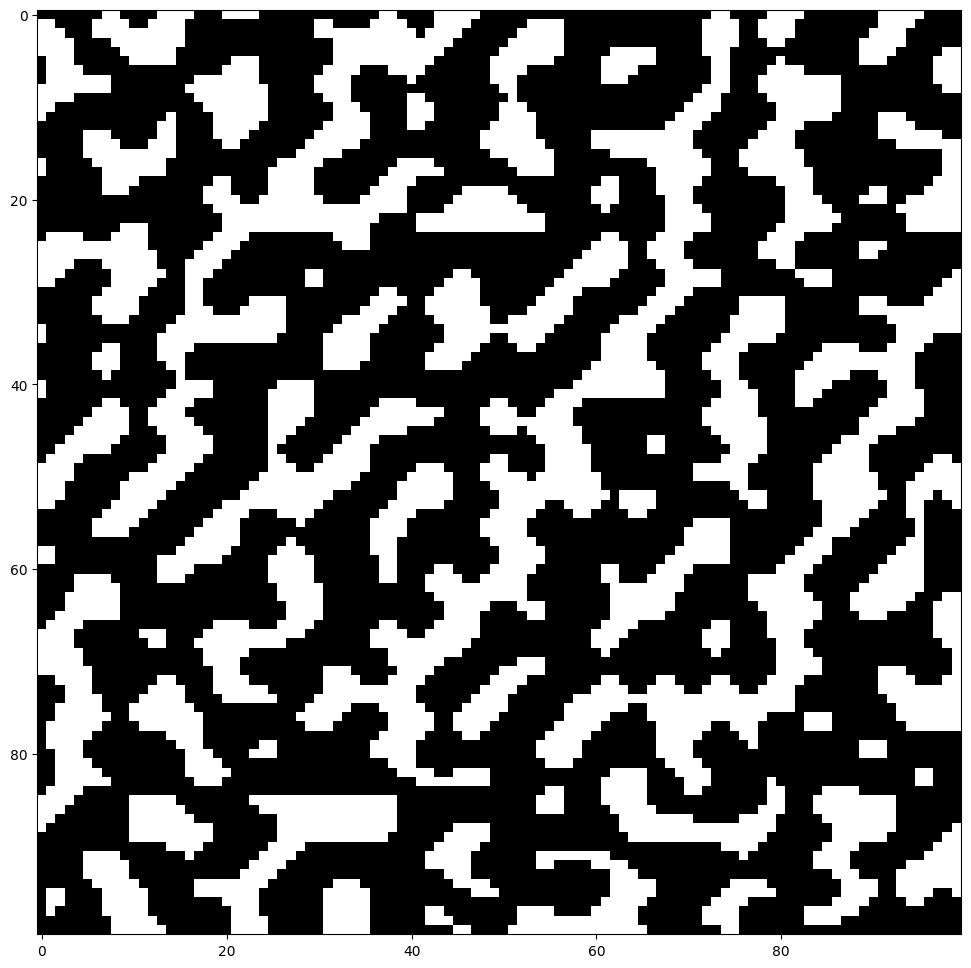

In [4]:
p = perlin_noise_grid
print(np.min(p),np.max(p),np.mean(p))

grid = (p > 0.1) * 1
grid = np.float32(grid)
plt.imshow(grid, cmap='grey')
plt.show()

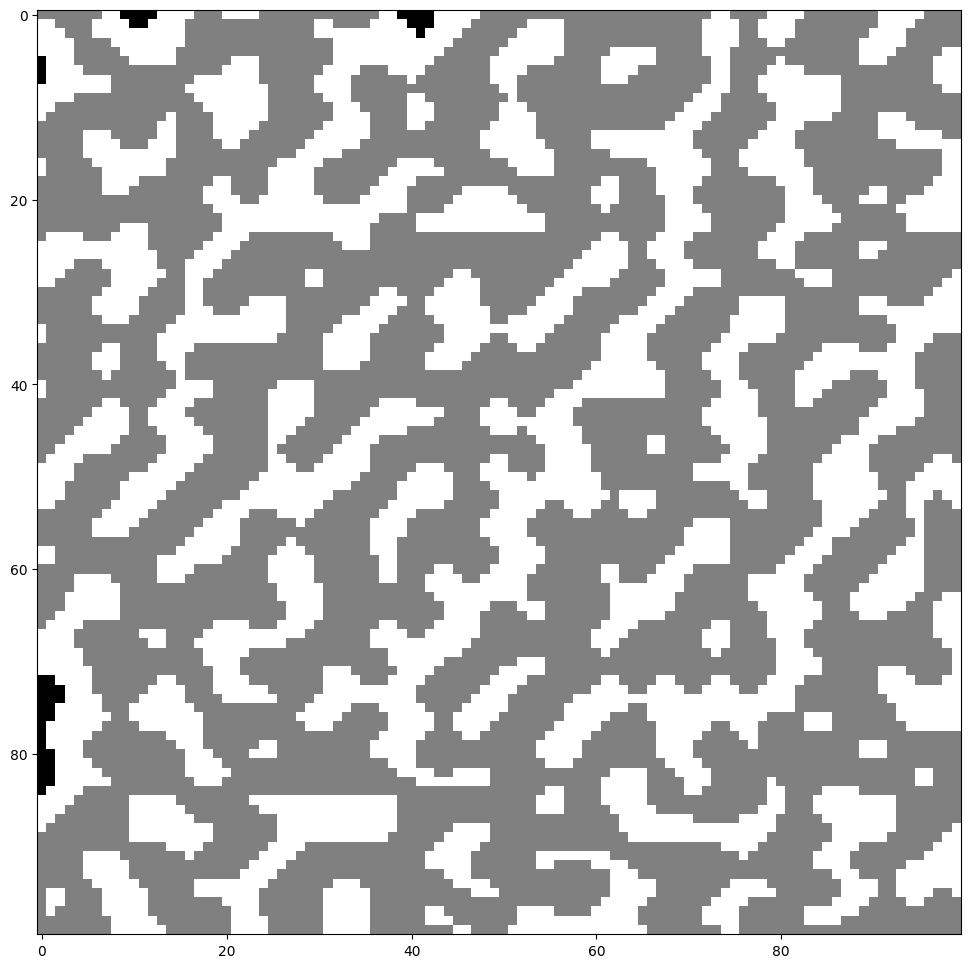

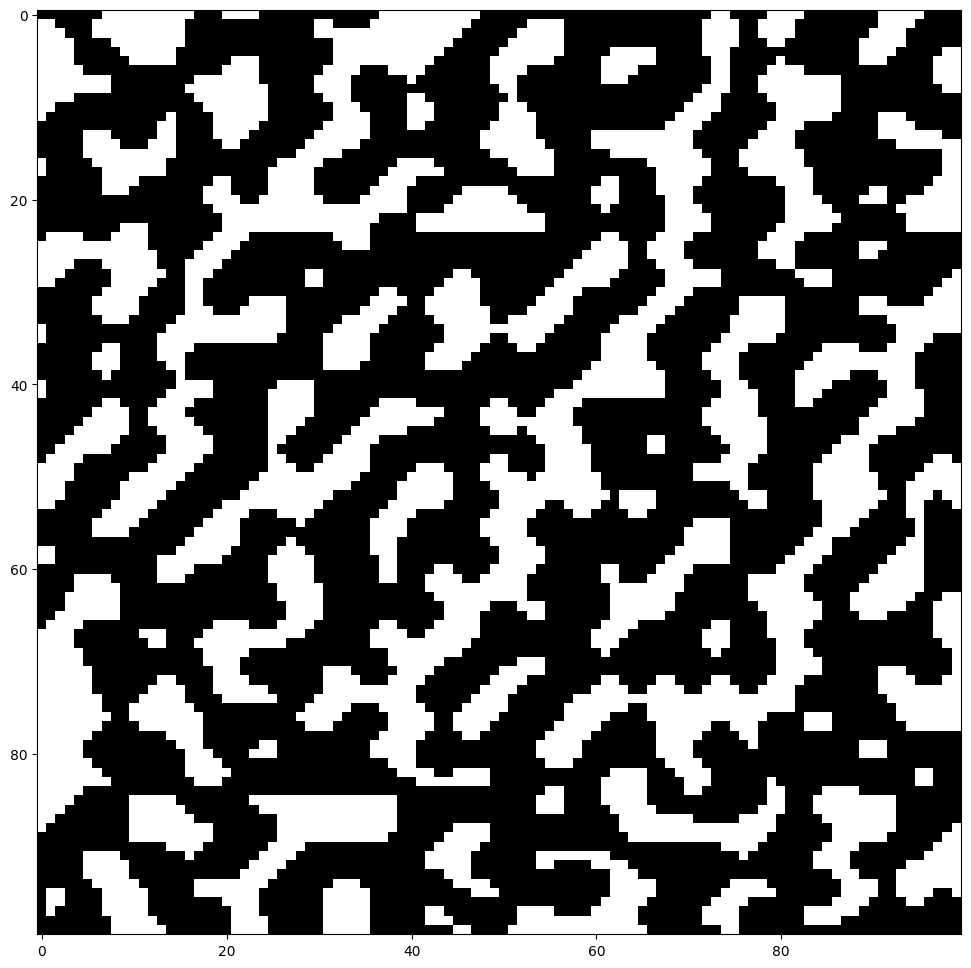

In [5]:
grid_copy = grid.copy()
flood_fill(grid_copy, start_point=(0,0), new_value=0.5)

plt.imshow(grid_copy, cmap='grey')
plt.show()

mask = (grid_copy == 0)
new_grid = grid + mask

plt.imshow(new_grid, cmap='grey')
plt.show()

## Spawning the agent
- Sample random cell
- if empty
  - Spawn point
- else
  - sample again

### Visibliity
 - Agent can see 5x5 around them
 - Implement by slicing  grid points
 - Initialize unknow global map
 - Update map by slicing information

### Movement
 - Randomly move in direction
 - if collision
   - Return to same state
 - else
   - Keep moving

In [7]:
def spawn_point(grid):
    """
    Spawn the agent at a random point in any point
    """
    h,w = grid.shape

    start_cell = 1 # INITIALIZE TO FILLED
    while start_cell != 0: # SEARCH TILL WE REACH A POINT WHICH IS EMPTY
        x = random.randint(0,w-1)
        y = random.randint(0,h-1)
        
        start_cell = grid[x,y]

    return np.array((x,y))

In [10]:
# WHEN AT POSITION X,Y
def get_visible(grid, x,y):
    """
    Get the slice of array which is visible to the agent from position x,y
    """
    padding = ((1, 1), (1, 1))  # Padding for height, width, channels
    padded_grid = np.pad(grid, padding, mode='constant', constant_values=1)
    visible_space = padded_grid[x:x+3, y:y+3]
    return visible_space

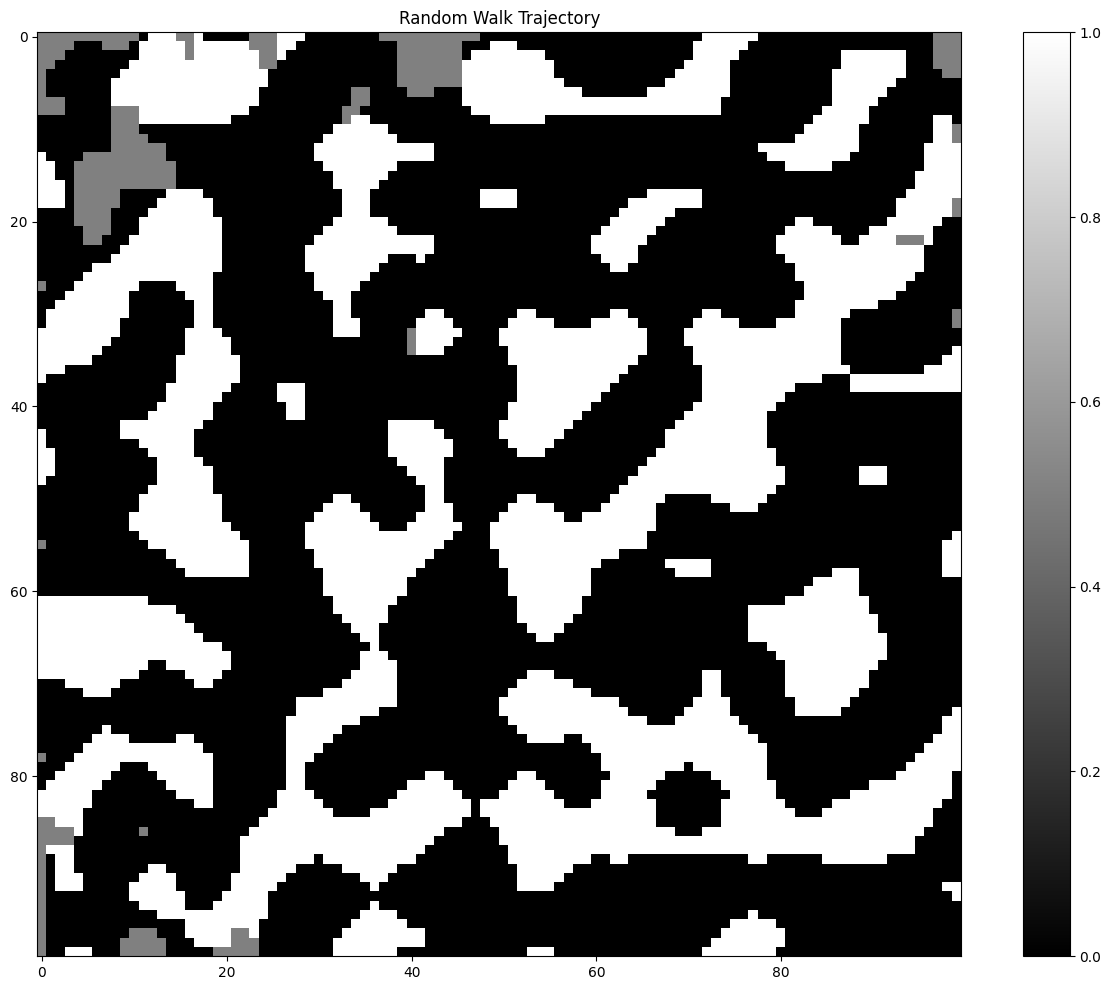

In [12]:
# Assuming grid dimensions are defined
height, width = 100, 100  # Example grid size

# Initialize starting position
current_pos = spawn_point(grid)

# Initialize the trajectory grid and list to track the trajectory
traj = np.zeros_like(grid) + 0.5
traj1 = []

# Number of steps for the random walk
steps = 100000

for i in range(steps):
    # Possible directions for movement (up, down, left, right)
    directions = [(0, 1), (0, -1), (-1, 0), (1, 0)]
    
    # Randomly choose a direction
    move = random.choice(directions)
    
    # Calculate the new position
    new_pos = current_pos + move
    
    # Ensure the new position is within the grid boundaries
    if 0 < new_pos[0] < height-1 and 0 < new_pos[1] < width-1:
        # If the new position is valid (i.e., grid[tuple(new_pos)] == 1), update position
        current_pos = new_pos
        patch = get_visible(grid, current_pos[0], current_pos[1])
        if traj[current_pos[0]-1:current_pos[0]+2, current_pos[1]-1:current_pos[1]+2].shape!= (3,3):
            print(traj[current_pos[0]-1:current_pos[0]+2, current_pos[1]-1:current_pos[1]+2], current_pos)
        traj[current_pos[0]-1:current_pos[0]+2, current_pos[1]-1:current_pos[1]+2] = patch
    else:
        # If the new position is out of bounds, stay in the current position
        pass
       
    # Track the trajectory
    traj1.append(tuple(current_pos))

# Display the trajectory as a heatmap
plt.imshow(traj, cmap='gray')
plt.title("Random Walk Trajectory")
plt.colorbar()
plt.show()

In [15]:
len(traj1)

100000

In [20]:
rand_grid = np.random.randint(10, size=(4, 4))
print(rand_grid)

[[3 0 9 6]
 [0 2 3 6]
 [4 6 3 2]
 [2 6 0 9]]


In [25]:
for i in range(16):
    x = i%4
    y = i//4
    print(get_visible(rand_grid, x,y))

[[1 1 1]
 [1 3 0]
 [1 0 2]]
[[1 3 0]
 [1 0 2]
 [1 4 6]]
[[1 0 2]
 [1 4 6]
 [1 2 6]]
[[1 4 6]
 [1 2 6]
 [1 1 1]]
[[1 1 1]
 [3 0 9]
 [0 2 3]]
[[3 0 9]
 [0 2 3]
 [4 6 3]]
[[0 2 3]
 [4 6 3]
 [2 6 0]]
[[4 6 3]
 [2 6 0]
 [1 1 1]]
[[1 1 1]
 [0 9 6]
 [2 3 6]]
[[0 9 6]
 [2 3 6]
 [6 3 2]]
[[2 3 6]
 [6 3 2]
 [6 0 9]]
[[6 3 2]
 [6 0 9]
 [1 1 1]]
[[1 1 1]
 [9 6 1]
 [3 6 1]]
[[9 6 1]
 [3 6 1]
 [3 2 1]]
[[3 6 1]
 [3 2 1]
 [0 9 1]]
[[3 2 1]
 [0 9 1]
 [1 1 1]]
